# Probability Questions 0 (from your excellent TA Morris)

1. **How does the estimation procedure called for finding the optimal parameter value(s) of a model given data work?** 
    * Maximum likelihood estimation, second derivate set to zero then solve the equation.
    * If you have multiple paramters do it for each parameter
2. **What are good working definitions for the likelihood and prior?**
    * likelihood: the density of the data (density isn'ta great choice of words); how likely is the data under the model;
        * the product of all of the marginal densities when there are a lot of data points/multiple random variables -> joint density = $\prod_{i=1}^{n}f_x(x_i | \theta)$
    * the joint density of the data as a function of the parameter theta (scott's def)
        * the function of the paramter part is important, 
    * prior: the belief about the paramter which is expressed as some function 
        * this is called the prior belief since we don't have any data yet
3. **What does introducing a prior mean in terms of choosing a model and its parameters?**
    * the prior comes before everything -> you don't have data then you choose parameters you care about which end up in a likelihood 
    * all the expiremental design happens before you start collecting data
    * choose prior to match the likehood (know the data model which is a function of the data and can be viewed as a function of the paramters then you need to think about what priors match for those paramters) 
4. **What is "certainty" or "level of belief" in how do you express it?**
    * certainty: can be expressed with the confidence interval which measures the probability (percent of certainty) in some sense 1 is strong 0 is low 
        * high prob = very certain, low prob = not certain
        * probability is a good way to describe certainty
        * confidence intervals give you a claim 
        * draw densities to describe certainties (more quantitative)
            * if super certain then more narrow density
    * the langauge of certainty is probability
<!--
    1. The terms "data" and "parameters" or "model" might be useful in the likelihood definition
    2. The terms "probability" or "belief" might be useful in the prior definition
-->

# Probability Questions 1

---

1. Estimate $\Pr(a \leq X \leq b)$ for $X \sim \textrm{beta}(\alpha,\beta)$ by sampling from a beta distribution 
2. Express this statement as an expectation with $f(x)$ the beta density in question 


(0.115, 0.500319021942819, 0.12541304200479841)

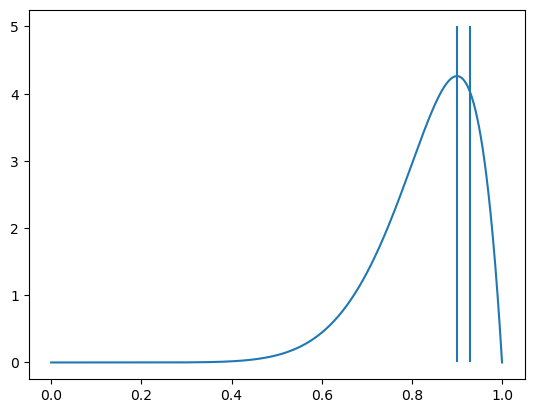

In [15]:
# problem 1
from scipy import stats
alpha, beta = 10, 2
my_beta = stats.beta(alpha, beta)

import matplotlib.pyplot as plt
import numpy as np
u_grid = np.linspace(0,1,1001)

#visually plot the beta distribution 
plt.plot(u_grid, my_beta.pdf(u_grid))

#estimate the probability analytically
a, b = .9, .93
my_beta.cdf(b)-my_beta.cdf(a)
plt.vlines([a,b],0, 5)

#estimate using sampling (cannot used cdf)
#using monte carlo method
n = 1000
x = my_beta.rvs(n)
in_interval = (x>= a) & (x <= b) #indicator function
in_interval.mean(), in_interval.std()/n++0.5, my_beta.cdf(b)-my_beta.cdf(a) # average of the indicator function

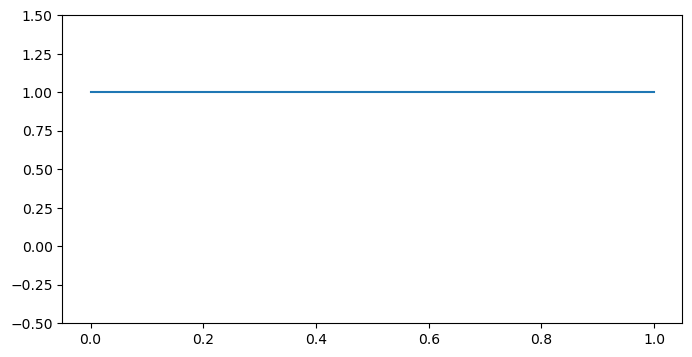

In [16]:
from scipy import stats
import numpy as np; import matplotlib.pyplot as plt

alpha,beta = 1,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

plt.figure(figsize=(8,4)); plt.ylim([-0.5,1.5])
plt.plot(parameter_domain, prior.pdf(parameter_domain));

In [48]:
prior.cdf(.2)
# you can use this to calculate the answer for number 1 above

0.2

In [7]:
m = 10000
(prior.rvs(m)<0.2).mean()


0.02

## Monte Carlo Integration
### All Bayesian estimates are just Monte Carlo Integration...

$$
\Large
\begin{align*}
\Pr(a\leq X\leq b)  {} = & \int_a^b f(x) dx \\
{} = & \int 1_{[a,b]}(x) f(x) dx = \mathrm{I\!E}[1_{[a,b]}(x_i)]\\
& \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\;\;\approx \frac{1}{n} \sum_{i=1}^n 1_{[a,b]}(x_i)
\end{align*}
$$

* certain integrals are expectations
* everything in bayesian inference is this type of calculation
* to make certainty statments about a distribution from a probability do something like this

In [53]:
(prior.rvs(m)<0.2).std()/m**0.5

0.0039818869898579495

# Diversion 1: Likelihoods

---


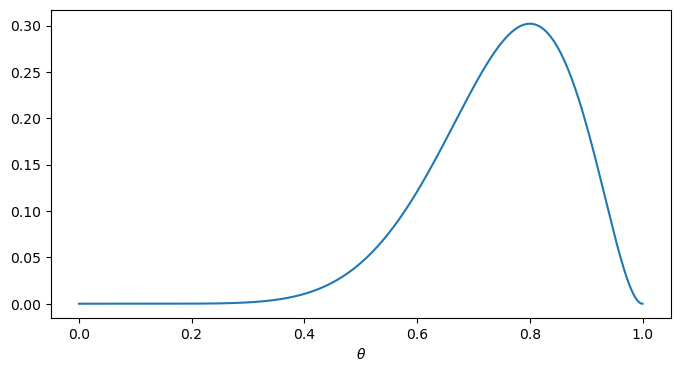

In [19]:
n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
#likelihood = lambda theta: stats.binom.pmf(n=n, k=x, p=theta)
#stats.binom.pmf(n=n, k=x, p=theta) creates the binomial pdf as a function of theta
# stats.binom(n=n, p=0.5) is an binomial object
likelihood = lambda theta: stats.binom(n=n, p=theta).pmf(x) # binomial object evaluated over x

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, likelihood(parameter_domain));

# Diversion 2: Posteriors

---

$$
\Large
\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
\end{align*}
$$
* the likelihood function is a distribution like above
* the area of the posterior needs to be 1 so it needs to be normalized so you can do the monte carlo stuff
* likehood times prior is always proportional to the posterior since the denomiator is some constant which we do not care about
### _The posterior is always proportional to the joint_(which is the likelihood times the prior)

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$
* so the posterior is a scaled function of the joint distribution (when theta and the data are RVs)

**_and the posterior is always a proper distribution if the prior is_**

* any probability statements that you make are belief statements

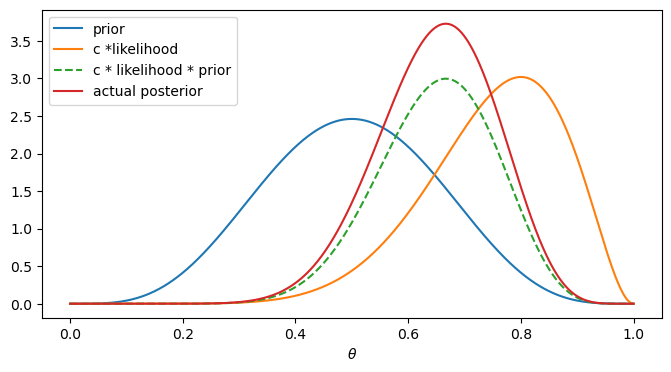

In [28]:
plt.figure(figsize=(8,4))

alpha,beta = 5,5; parameter_domain = np.linspace(0,1,1000) #try 1000 values
#paramter_domain is a 1x1000 dimension vector
#selected arbitrarily, represents what you think the paramter value might actually be before seeing any data
#bayes' formula tells you how you can update what you believe is the prio=
prior = stats.beta(a=alpha,b=beta) #define the prior

plt.plot(parameter_domain, prior.pdf(parameter_domain), 
         label='prior') #plot the prioi

n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda p: stats.binom(n, p=p).pmf(x)


c = 10 
#the likelihood is scaled by the constant c
plt.plot(parameter_domain, c*likelihood(parameter_domain),
         label='c *likelihood')

# the green curve is element wise multiplication of the two vectors scaled by the constant c
plt.plot(parameter_domain, 
         c*likelihood(parameter_domain)*prior.pdf(parameter_domain),
         label='c * likelihood * prior', linestyle="--")
# the posterior distribution here is calculated without vector multiplication
# n-10, x=8, a=b=5 -> the prior is beta -> the posterior is a beta distribution beta(x+a, n-x+b)
# it is analytically derived 
# this is now what you believe, doesn't disagree with the prior just an updated way of thinking about things
posterior = stats.beta(a=alpha+x,b=beta+n-x)

plt.plot(parameter_domain, posterior.pdf(parameter_domain), 
         label='actual posterior')

plt.legend(); plt.xlabel('$\\theta$');

# Probability Questions 2

---

1. Estimate $\Pr(a \leq p \leq b | x)$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ based on sampling 
2. What values for $a$ and $b$ solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$?
    * a = 0, b = what goes into the cdf function of the beta distribution to get 95%
    * there are other values that could work to like for example: the values that go into the cdf function that give you 0.025 you get these values using the inverse cdf function and inputing 0.025
        *my_beta.ppf(0.025)
    * there are an infinite number of choices for a and b
    * a and b do not form a confidence interval, it is your statement of belief = 'i believe there is 95% that the...' because that's how it is
3. What is your best guess of the values for $a$ and $b$ that solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ if you only have a sample from the beta distribution?
    * without the analytical posterior you estimate the a and b from the sample by sorting the sample smallest to larger and then take the middle 95% percentile

0.025

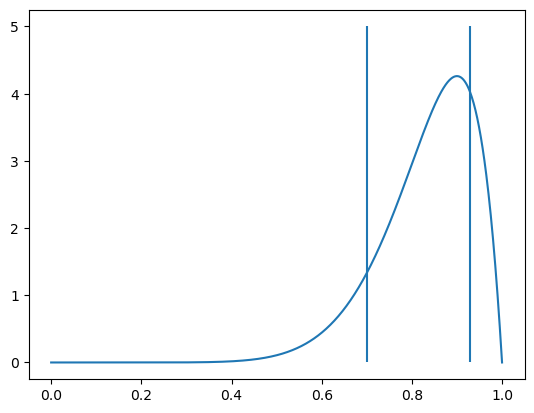

In [33]:
#1
from scipy import stats
alpha, beta = 10, 2
my_beta = stats.beta(alpha, beta)

import matplotlib.pyplot as plt
import numpy as np
u_grid = np.linspace(0,1,1001)

#visually plot the beta distribution 
plt.plot(u_grid, my_beta.pdf(u_grid))

#estimate the probability analytically
a, b = .7, .93
my_beta.cdf(b)-my_beta.cdf(a)
plt.vlines([a,b],0, 5)
#estimate using sampling (cannot used cdf)
alpha, beta = 5,5
n,x = 10, 8
m = 1000 #for the number of monte carlo 
samples = my_beta.rvs(m)
my_beta = stats.beta(alpha+x, beta+n-x)
in_interval = (samples>= a) & (samples <= b) #indicator function
in_interval.mean(), in_interval.std()/n++0.5, my_beta.cdf(b)-my_beta.cdf(a) # average of the indicator function

#2
my_beta.cdf(my_beta.ppf(0.025))



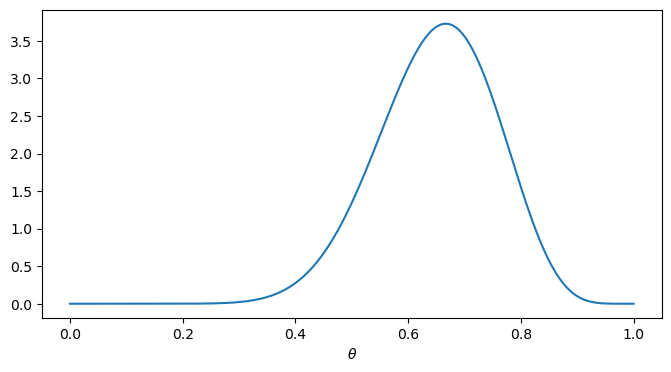

In [4]:
#this is the posterior from above, the analytical calculation of combining the data as stated in the comment above
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
posterior = stats.beta(a=alpha+x, b=beta+n-x)
plt.plot(parameter_domain, posterior.pdf(parameter_domain));


In [36]:
posterior_m = posterior.rvs(m) #posterior monte carlo samples
sorted(posterior_m)[int(m/40)], sorted(posterior_m)[-int(m/40)]
#first is lower .025 percent and the second is the the 97.5 percent
#this is NOT a confidence interval IT IS THE POSTERIOR BELIEF STATEMENT WHICH IS CALLED THE CREDIBLE INTERVAL
#this way of doing it is also a monte carlo estimation

(0.42336962451762644, 0.8431452649434539)

## Bayesian Credible Interval
$$\Large
\begin{align*}
\underset{\text{e.g., $\alpha=0.05$}}{(1-\alpha)} &\approx{} \int_a^b  p(\theta|x) d\theta \\ & {} \quad \quad  \text{ for } \quad \underset{\text{where $\theta_{(k)}$ is the $k^{th}$ rank ordered posterior sample}}{a=\theta_{\left(\left\lfloor m\times\frac{\alpha}{2}\right\rfloor\right)} \text{ and } b=\theta_{\left(\left\lceil m\times(1-\frac{\alpha}{2})\right\rceil\right)}}
\end{align*}
$$
* this is NOT a confidence interval
* means you have a posterior and have sampled from it and taken the middle whatever percent of the data


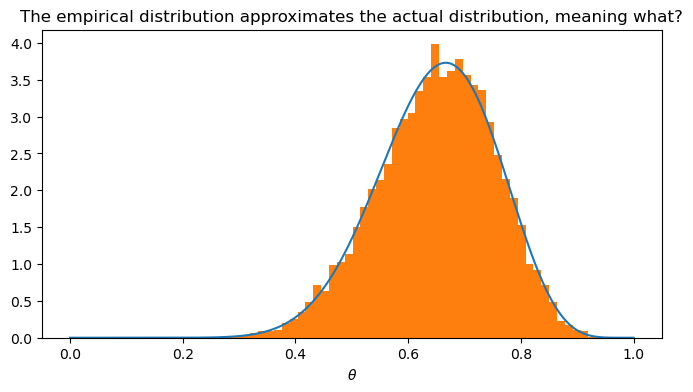

In [9]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.title("The empirical distribution approximates the actual distribution, meaning what?")
plt.plot(parameter_domain, posterior.pdf(parameter_domain));
hist = plt.hist(posterior_m, bins=50, density=True)

#plt.vlines([sorted(posterior_m)[int(m/40)],
#            sorted(posterior_m)[-int(m/40)]],0,hist[0].max()); 

* the blue curve above is the posterior it has been traded for the orange histogram
* everything you need to do can be done with the histogram since everything is a probability estimate which can be made with belief system since bayesian

5. What does the fact that the empirical distribution approximates the actual distribution allow us to do?
    * you can make a bunch of sample based probability statements and produce a bayesian credible - the analytical function is not needed
    * allows you to throw away the function
6. Why might this be useful?
    * useful for procedures when you don't have the functions but you do have the samples that are produced from it
    * i.e you have the orange samples but none of the blue curve
    * useful when you don't have the posterior function
7. How is this different than calculating probabilities?
    * it isn't except one does an actual intergral and the other is an estimate of the integral
8. Why is Bayesian inference different from Frequentist inference?
    * since the parameters of interest are RVs not a fixed constant now so they have distributions so you make probability statements about the paramters (in frequentist you make confidence statements)
    * can make belief statements about the parameters -> this is how you inform about the parameter"

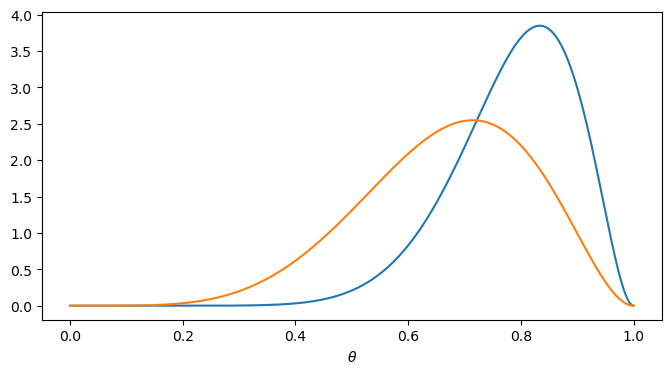

In [10]:
alpha,beta = 3,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

n1,x1 = 10,8  
posterior1 = stats.beta(a=alpha+x1,b=beta+n1-x1)
n2,x2 = 5,3  
posterior2 = stats.beta(a=alpha+x2,b=beta+n2-x2)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, posterior1.pdf(parameter_domain))
plt.plot(parameter_domain, posterior2.pdf(parameter_domain));


9. What is $\Pr(\theta_1<\theta_2|x1,x2) = \int\int 1_{\theta_1 < \theta_2}(\theta_1, \theta_2) p(\theta_1|x1)p(\theta_2|x2) d \theta_1 d \theta_2$?
    * theta_1 and theta_2 are parameters of coin flipping processes -> two posterior analyses in parallel the above are the two posteriors
    * blue = theta 1 success distribution 
    * orange = theta 2 success distribution 
        * believe the blue has more success with a chance (probability) of ??? by comparing drawn samples from each posterior then compare which is bigger then keep repeating -> this is a 2d integral over theta1 and theta2 -> integrating over t1 and t2 densities -> the above integral is just another monte carlo estimate -> calculate the probability that the first is less than the second
10. What is the chance that a single sample $\theta_1^{(m)}$ is less than another single sample $\theta_2^{(m)}$?
11. What is the density $f(\theta_1 \div \theta_2)$
    * sample from the distribution which is the ratio of the two things by sampling theta 1 theta 2 and take their ratio and store it and repeat

# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

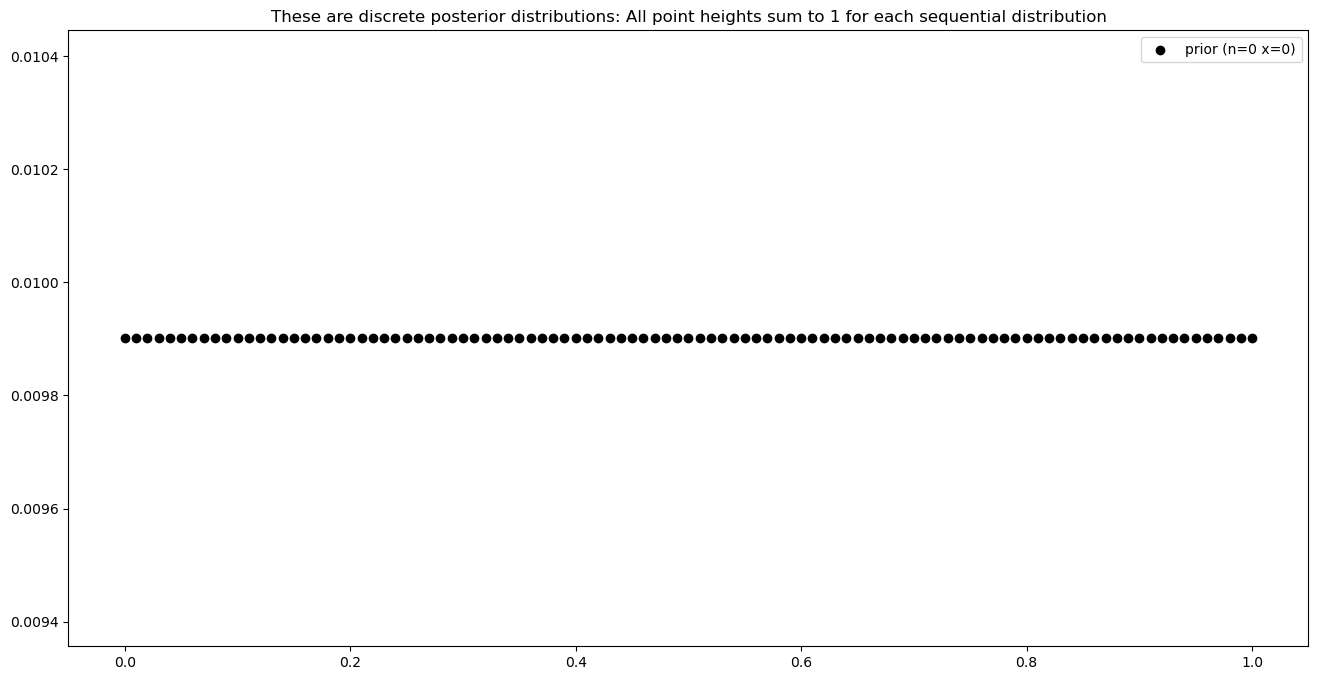

In [131]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution
    
    # or do updates in a truly sequential manner using Bernoulli
    # prior = posterior  # for each Bernoulli observation update
    
    # plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

* can draw one data point to update prior to posterior and call it a prior and keep doing that 

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data